In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# imported all files that are required
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
heart_data = pd.read_csv("/content/drive/MyDrive/Datasets/Final_heart.csv")  #loading datafile from drive

Data preprocessing

In [ ]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,921.000000,922.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,53.528773,132.454447,199.034670,0.231853,136.819068,0.886024,0.551463
std,9.428420,18.507227,109.174326,0.422244,25.449426,1.064875,0.497614
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart_data.isnull().sum()

Age               2
Sex               2
ChestPainType     0
RestingBP         1
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart_data.duplicated().sum()

0

<Axes: >

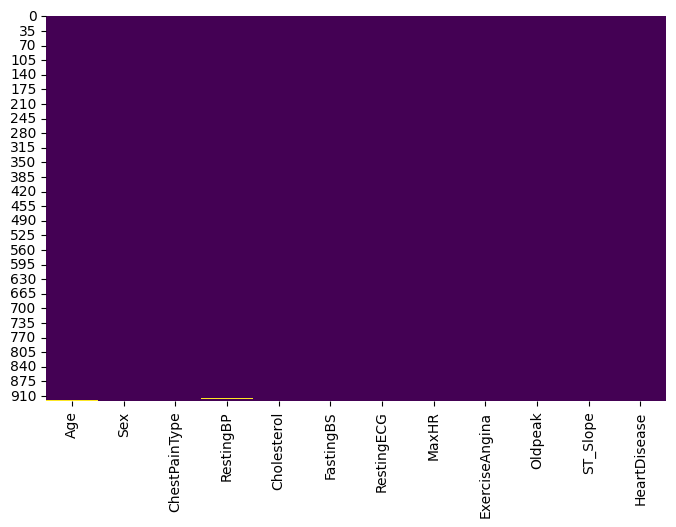

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(heart_data.isnull(),cbar=False,cmap='viridis')    # plotting null values


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             921 non-null    float64
 1   Sex             921 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       922 non-null    float64
 4   Cholesterol     923 non-null    int64  
 5   FastingBS       923 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           923 non-null    int64  
 8   ExerciseAngina  923 non-null    object 
 9   Oldpeak         923 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.7+ KB


In [ ]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,921.000000,922.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,53.528773,132.454447,199.034670,0.231853,136.819068,0.886024,0.551463
std,9.428420,18.507227,109.174326,0.422244,25.449426,1.064875,0.497614
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.500000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


ChestPainType contains 4 types which are : 
1. ATA
2. NAP
3. ASY
4. TA
5. TAA
----------------------------
Count for each type :::
ASY    498
NAP    205
ATA    174
TA      45
TAA      1
Name: ChestPainType, dtype: int64
----------------------------
----------------------------


Text(0.5, 1.0, 'Counts of Each class of ChestPainType')

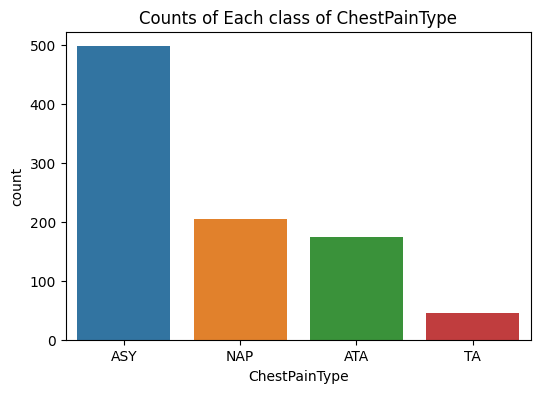

In [ ]:
print("ChestPainType contains 4 types which are : ")        # using basig functionalities of python loops
i=1
for x in heart_data['ChestPainType'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart_data['ChestPainType'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
sns.countplot(x=heart_data['ChestPainType'], order= ['ASY','NAP','ATA','TA'])
plt.title("Counts of Each class of ChestPainType")

ST_Slope contains 3 types which are : 
1. Up
2. Flat
3. Down
----------------------------
Count for each type :::
Flat    463
Up      397
Down     63
Name: ST_Slope, dtype: int64
----------------------------
----------------------------


Text(0.5, 1.0, 'Counts of Each class of ST_Slope')

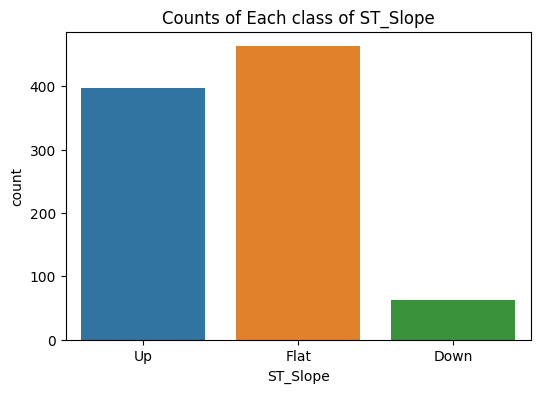

In [ ]:
print("ST_Slope contains 3 types which are : ")
i=1
for x in heart_data['ST_Slope'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart_data['ST_Slope'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
sns.countplot(x=heart_data['ST_Slope'])
plt.title("Counts of Each class of ST_Slope")

RestingECG contains 3 types which are : 
1. Normal
2. ST
3. LVH
----------------------------
Count for each type :::
Normal    554
LVH       191
ST        178
Name: RestingECG, dtype: int64
----------------------------
----------------------------


Text(0.5, 1.0, 'Counts of Each class of RestingECG')

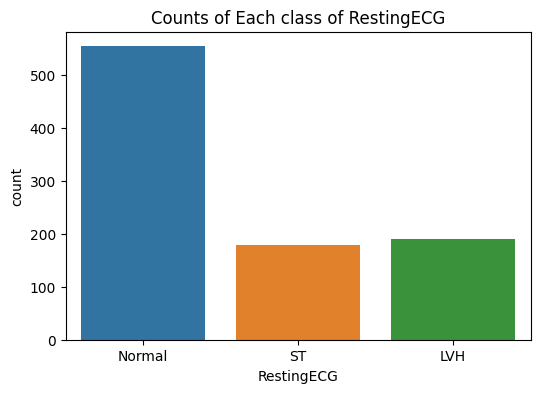

In [ ]:
print("RestingECG contains 3 types which are : ")
i=1
for x in heart_data['RestingECG'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart_data['RestingECG'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
sns.countplot(x=heart_data['RestingECG'])
plt.title("Counts of Each class of RestingECG")

In [ ]:
binary_variables = ['Sex','FastingBS','ExerciseAngina','HeartDisease']

for variable in binary_variables:
  print("Count for each type of {} :::".format(variable))
  print(heart_data[variable].value_counts())
  print("----------------------------")

Count for each type of Sex :::
M    726
F    195
Name: Sex, dtype: int64
----------------------------
Count for each type of FastingBS :::
0    709
1    214
Name: FastingBS, dtype: int64
----------------------------
Count for each type of ExerciseAngina :::
N    551
Y    372
Name: ExerciseAngina, dtype: int64
----------------------------
Count for each type of HeartDisease :::
1    509
0    414
Name: HeartDisease, dtype: int64
----------------------------


In [ ]:
x = np.where(heart_data['ChestPainType'] == "TAA","TA",heart_data['ChestPainType'])  # removing unintentional sysnonyms
heart_data['ChestPainType'] = x

In [ ]:
heart_data.isnull().sum()    # checking null values

Age               2
Sex               2
ChestPainType     0
RestingBP         1
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')                  # simpleimputer to impute values pf age and resting bp
imputed_Age = imputer.fit_transform(heart_data[['Age']])
imputed_Age = imputed_Age.astype(int)
heart_data["Age"] = imputed_Age

In [ ]:
imputer = SimpleImputer(strategy='median')
imputed_RestingBP = imputer.fit_transform(heart_data[['RestingBP']])
imputed_RestingBP = imputed_RestingBP.astype(int)
heart_data["RestingBP"] = imputed_RestingBP

# ***Exploratory Data Analysis***

Univariate Analysis

<ipython-input-20-672bcca729de>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

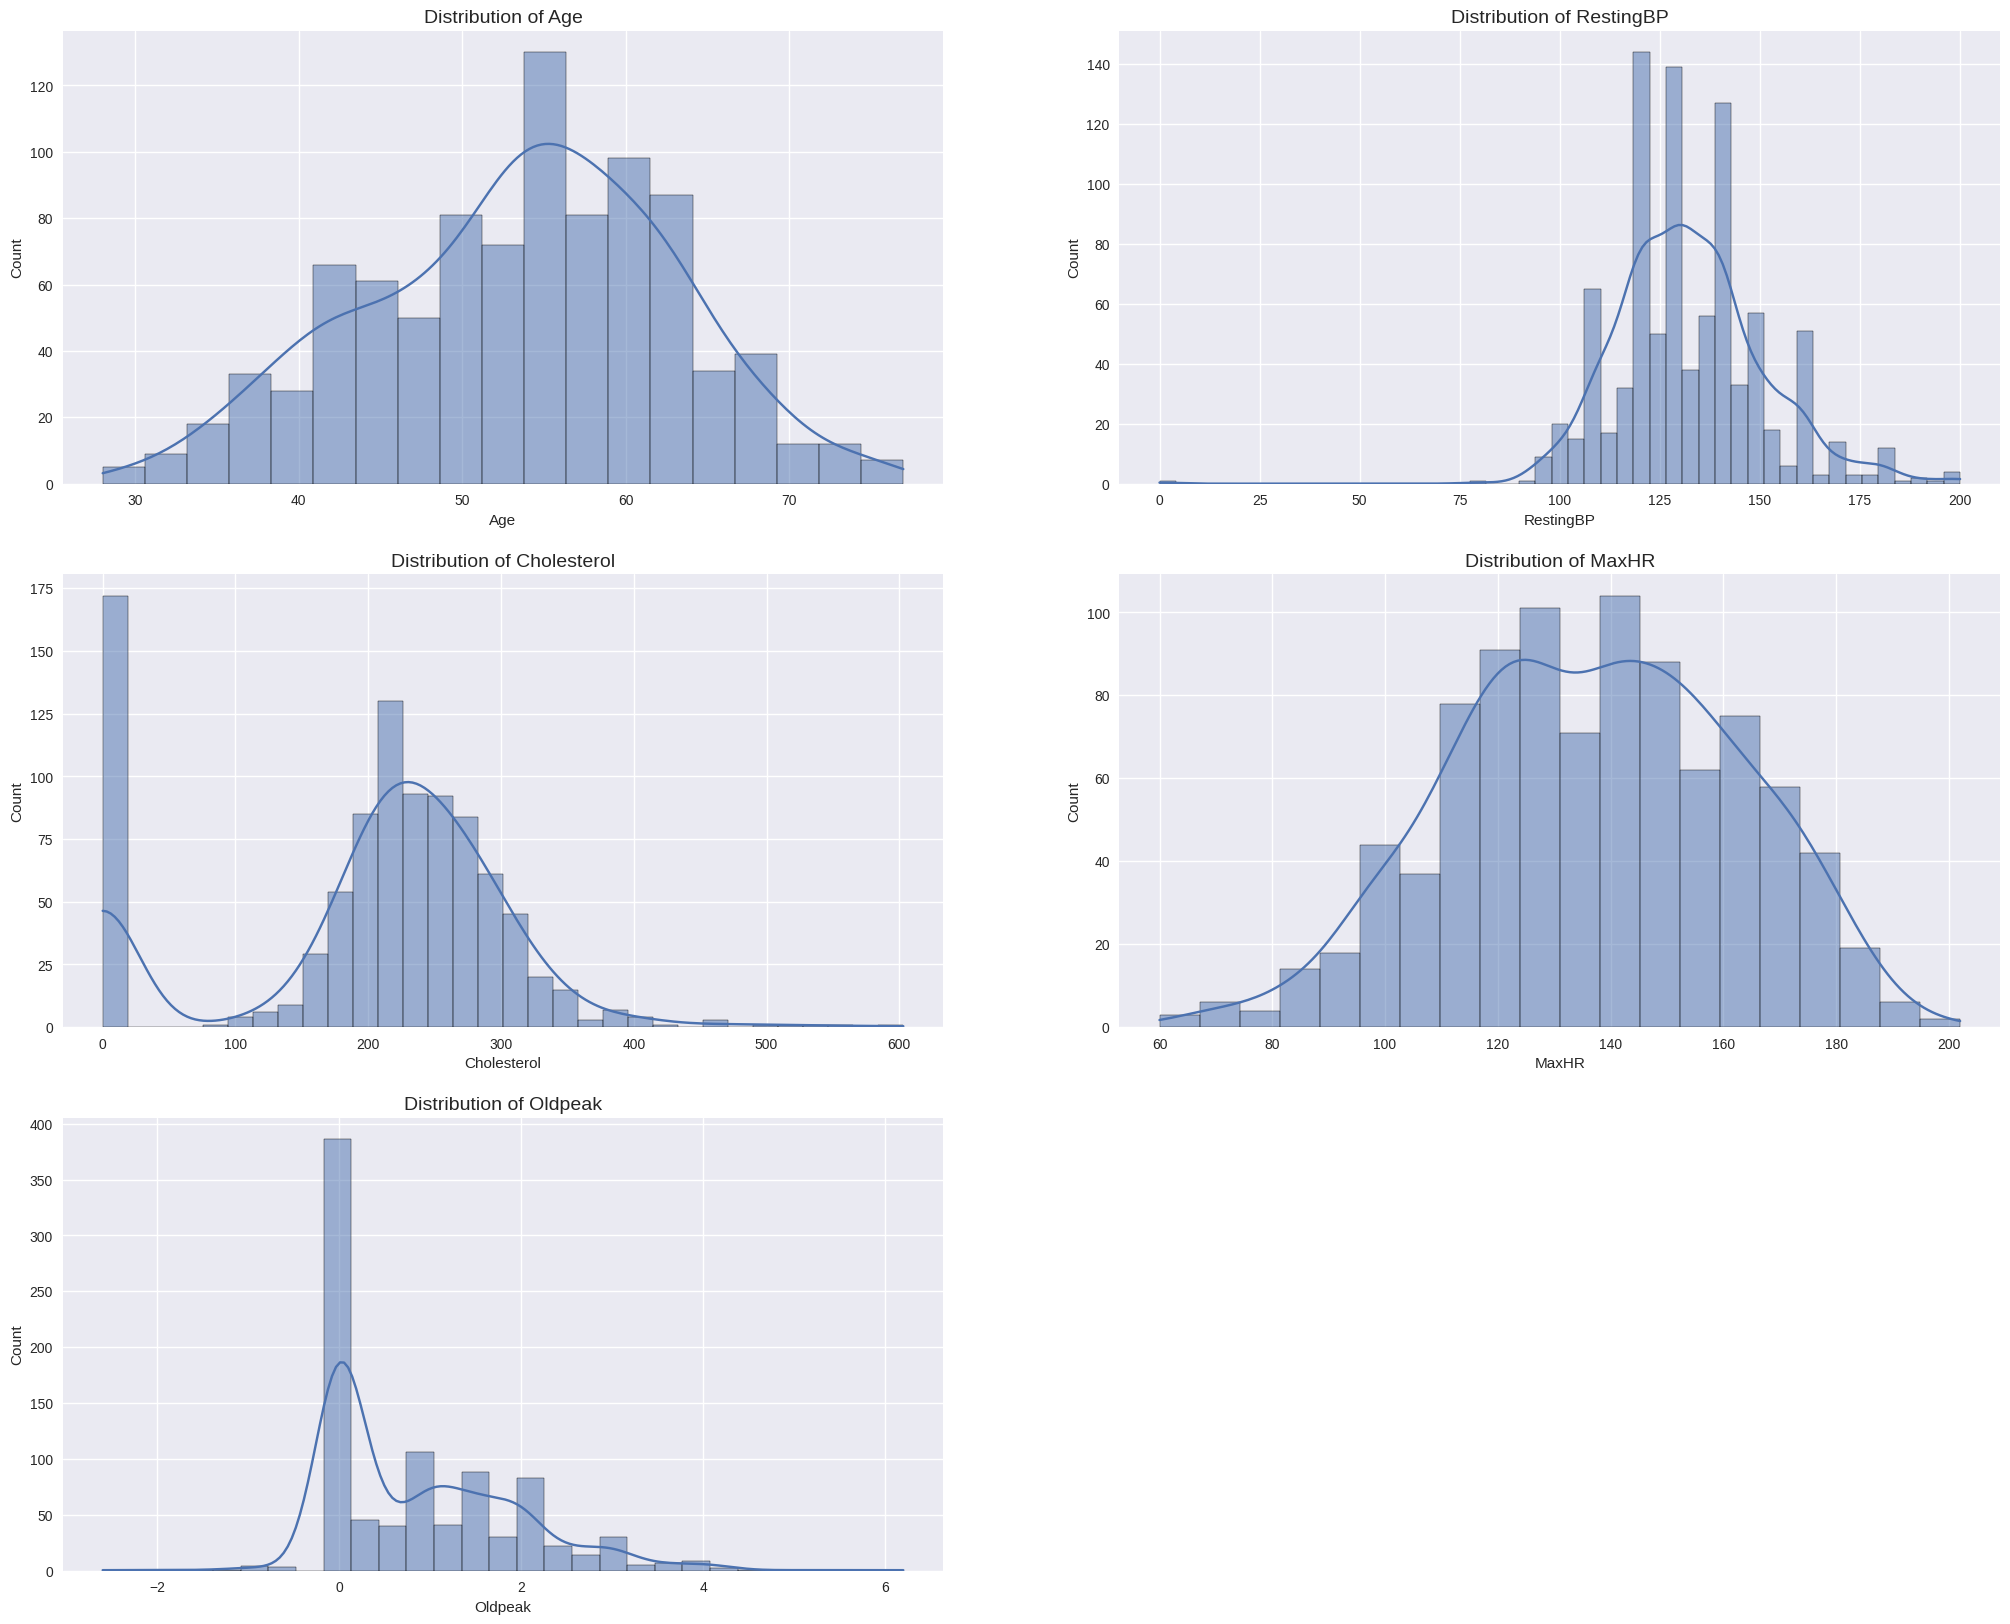

In [ ]:
numerical_variables = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.style.use("seaborn")
plt.subplots_adjust(top=0.9,hspace=6,wspace = 1)  # setting charateristics of subplots
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
i=1
for feature in heart_data.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.histplot(data=heart_data, x=feature, kde=True)
        plt.title("Distribution of {}".format(feature), fontsize=14) # subplot functionality
        i+=1

Text(0.5, 1.0, 'Distribution of HeartDisease')

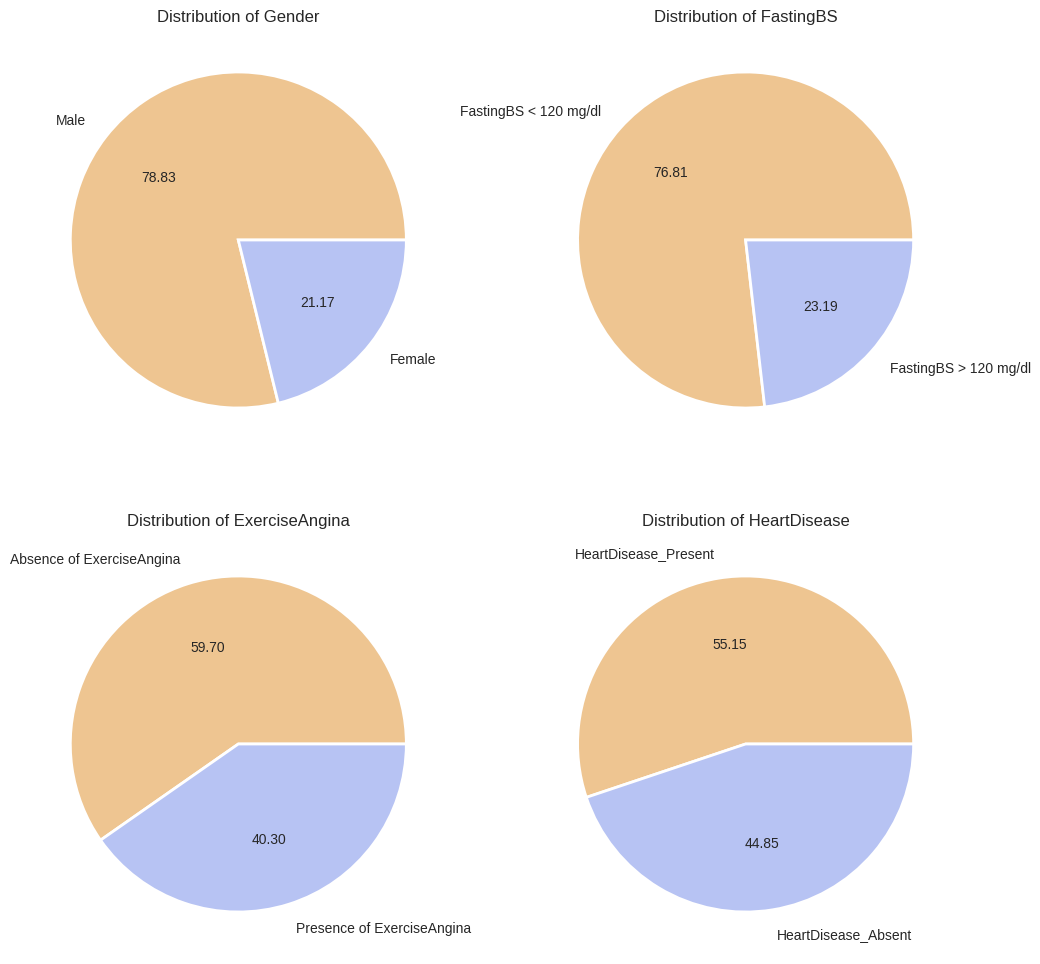

In [ ]:
binary_variables = ['Sex','FastingBS','ExerciseAngina','HeartDisease']  # checking a proprotion of binary variables
colors = ['#EEC591', '#B7C3F3']
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
values = heart_data['Sex'].value_counts()
labels = ['Male','Female']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors, autopct= '%.2f');
plt.title("Distribution of Gender")
plt.subplot(2,2,2)
values = heart_data['FastingBS'].value_counts()
labels = ['FastingBS < 120 mg/dl','FastingBS > 120 mg/dl']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors, autopct= '%.2f');
plt.title("Distribution of FastingBS")
plt.subplot(2,2,3)
values = heart_data['ExerciseAngina'].value_counts()
labels = ['Absence of ExerciseAngina','Presence of ExerciseAngina']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors,autopct= '%.2f');
plt.title("Distribution of ExerciseAngina")
plt.subplot(2,2,4)
values = heart_data['HeartDisease'].value_counts() #'#4F6272', '#B7C3F3'
labels = ['HeartDisease_Present','HeartDisease_Absent']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors,autopct= '%.2f');
plt.title("Distribution of HeartDisease")


Text(0.5, 1.0, 'Counts of Chest pain types')

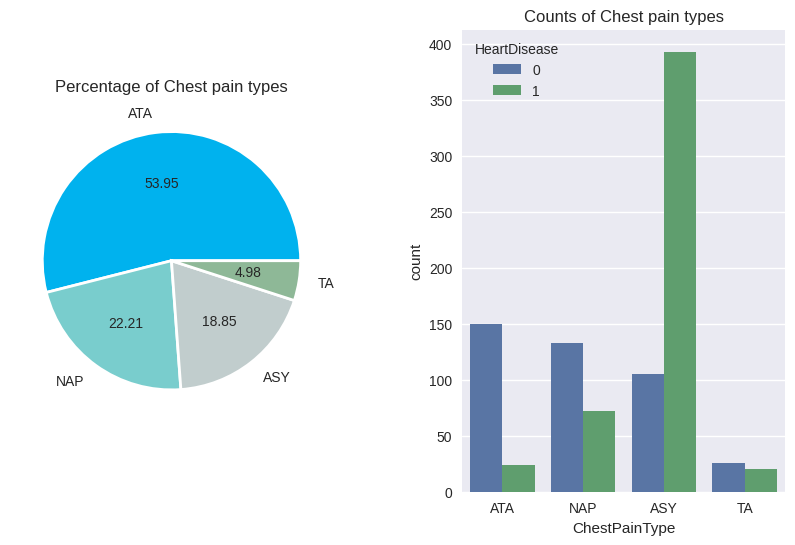

In [ ]:
values = heart_data['ChestPainType'].value_counts()   # checking frequency distribution and proportion of multiclass variables
labels = heart_data['ChestPainType'].unique()
colors = ['#00B2EE', '#79CDCD', '#C1CDCD', '#8EB897']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Percentage of Chest pain types")
plt.subplot(1,2,2)
sns.countplot(x=heart_data['ChestPainType'], hue=heart_data['HeartDisease'])
plt.title("Counts of Chest pain types")

Text(0.5, 1.0, 'Counts of ST_Slope')

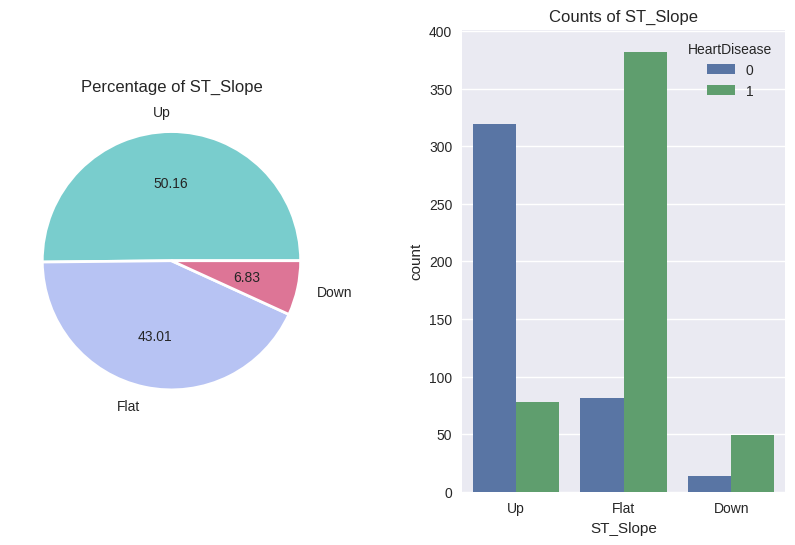

In [ ]:
values = heart_data['ST_Slope'].value_counts()
labels = heart_data['ST_Slope'].unique()
colors = ['#79CDCD', '#B7C3F3', '#DD7596', '#8EB897']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Percentage of ST_Slope")
plt.subplot(1,2,2)
sns.countplot(x=heart_data['ST_Slope'], hue=heart_data['HeartDisease'])
plt.title("Counts of ST_Slope")

Text(0.5, 1.0, 'Counts of RestingECG classes')

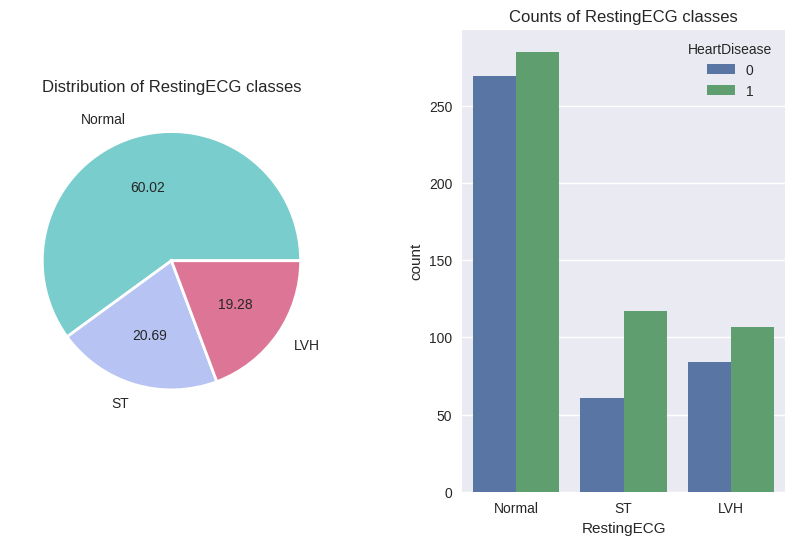

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
values = heart_data['RestingECG'].value_counts()
labels = heart_data['RestingECG'].unique()
colors = ['#79CDCD', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Distribution of RestingECG classes")
plt.subplot(1,2,2)
sns.countplot(x=heart_data['RestingECG'], hue=heart_data['HeartDisease'])
plt.title("Counts of RestingECG classes")

In [ ]:
from scipy.stats import chi2_contingency                    # executing chi square value to explore relation ship between categorical variables

# list of categorical variables
variables = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 'ST_Slope', 'RestingECG']

# loop over each combination of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        # contingency table of two categorical variables
        cont_table = pd.crosstab(heart_data[variables[i]], heart_data[variables[j]])

        # perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(cont_table)

        # print the results
        print(f"Chi-square test between {variables[i]} and {variables[j]}")
        print("Chi-square test statistic:", chi2)
        print("p-value:", p_value)
        print("\n")


Chi-square test between Sex and FastingBS
Chi-square test statistic: 12.90406350812054
p-value: 0.0003278695399026149


Chi-square test between Sex and ExerciseAngina
Chi-square test statistic: 33.22455800561516
p-value: 8.210700938693314e-09


Chi-square test between Sex and ChestPainType
Chi-square test statistic: 38.500076231365
p-value: 2.214909587326297e-08


Chi-square test between Sex and ST_Slope
Chi-square test statistic: 21.989825601395843
p-value: 1.6786882154432654e-05


Chi-square test between Sex and RestingECG
Chi-square test statistic: 5.471401548433668
p-value: 0.06484854698736298


Chi-square test between FastingBS and ExerciseAngina
Chi-square test statistic: 3.2005037109667667
p-value: 0.07361559375029998


Chi-square test between FastingBS and ChestPainType
Chi-square test statistic: 23.88498610461084
p-value: 2.6399863780390804e-05


Chi-square test between FastingBS and ST_Slope
Chi-square test statistic: 28.431539515417434
p-value: 6.701463217666277e-07


Chi-sq

Multivariave Analysis

<ipython-input-26-c9c2f11dbe13>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

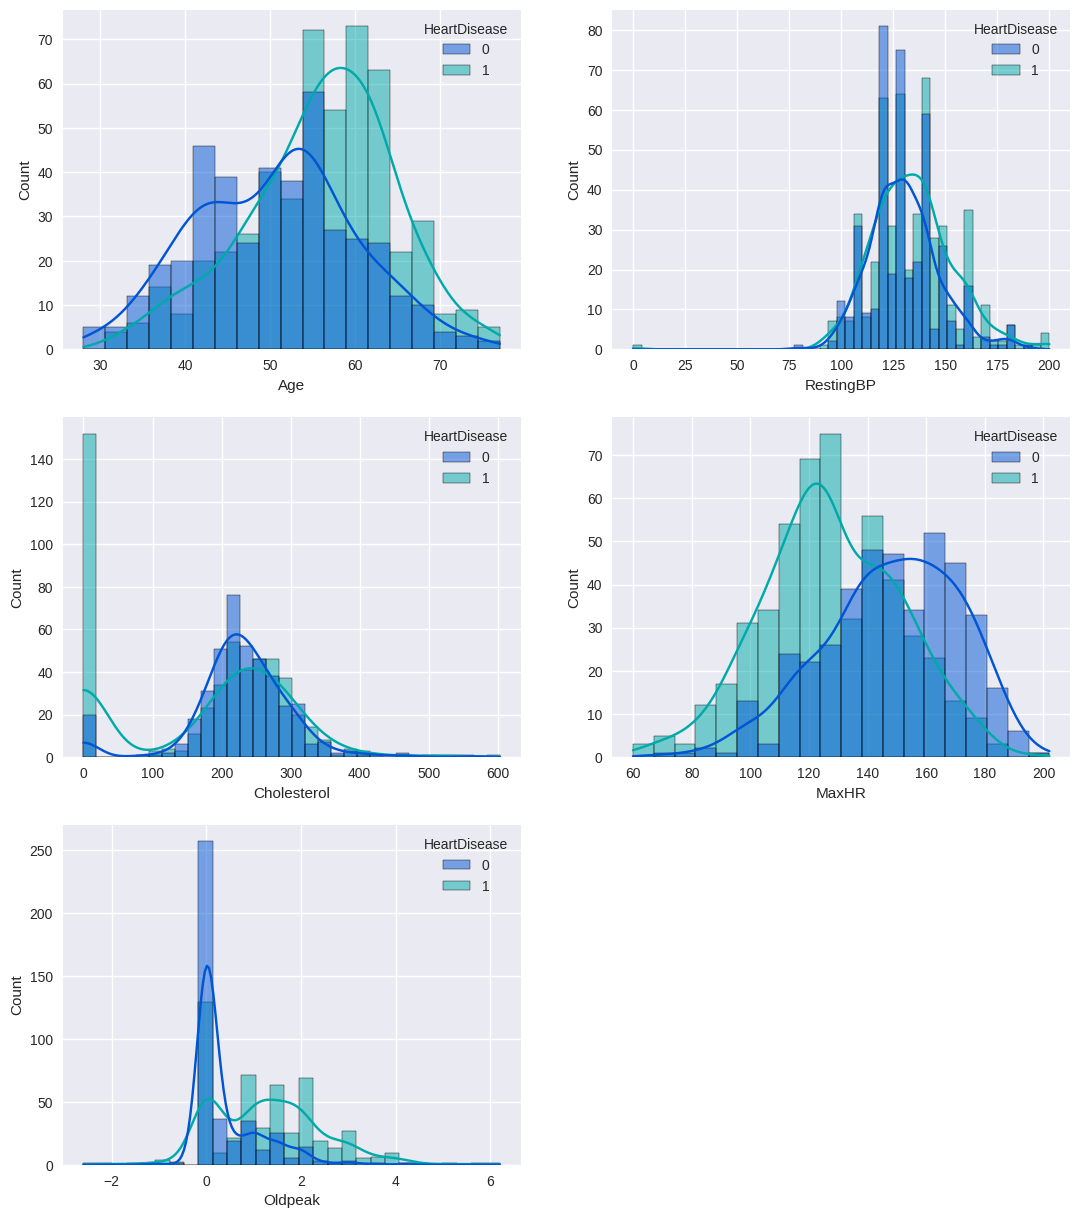

In [ ]:
numerical_variables = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in heart_data.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.histplot(data=heart_data, x=feature, kde=True, palette="winter", hue='HeartDisease')
        i+=1

<Axes: xlabel='HeartDisease', ylabel='Sex'>

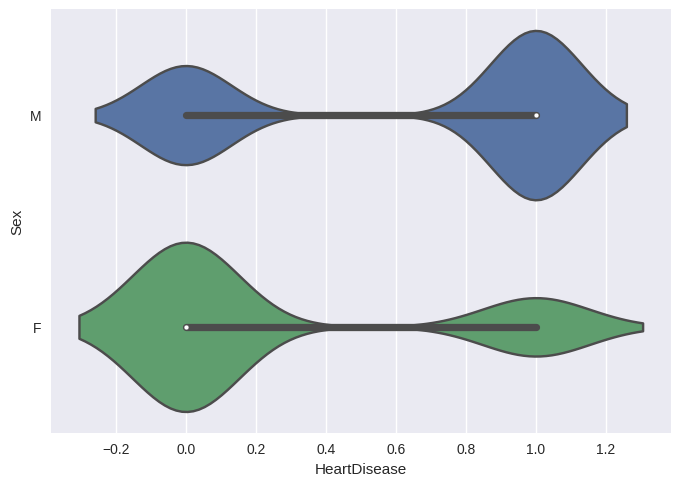

In [ ]:
sns.violinplot(x = heart_data['HeartDisease'] , y = heart_data['Sex']) # which specific gender is most likely to have heart Disease

Text(0.5, 1.0, 'Age vs Cholesterol')

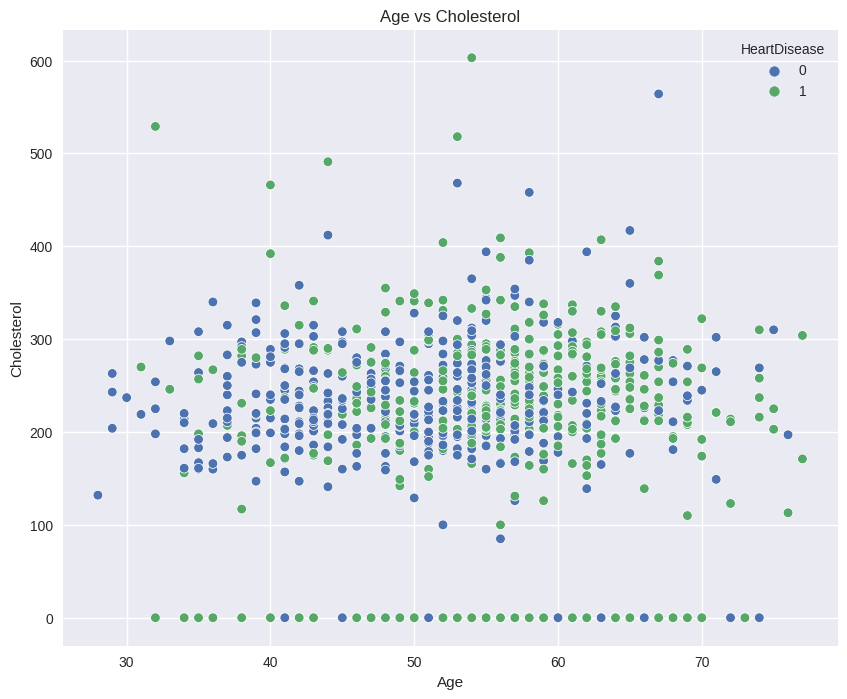

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart_data["Age"], y=heart_data["Cholesterol"],hue = heart_data['HeartDisease']).set_title("Age vs Cholesterol")

Text(0.5, 1.0, 'Age vs MaxHR')

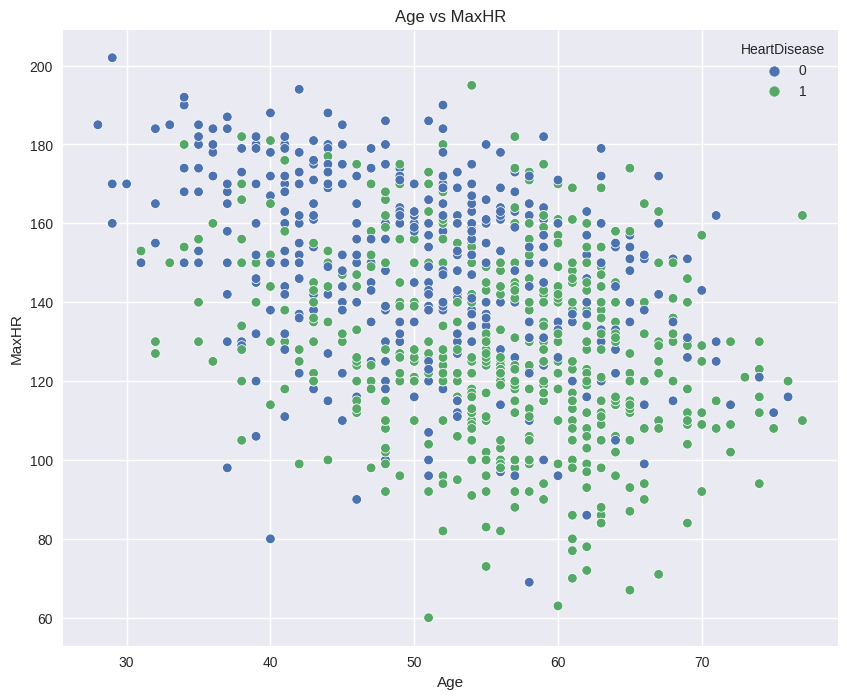

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart_data["Age"], y=heart_data["MaxHR"],hue = heart_data['HeartDisease']).set_title("Age vs MaxHR")

Text(0.5, 1.0, 'Age vs RestingBP')

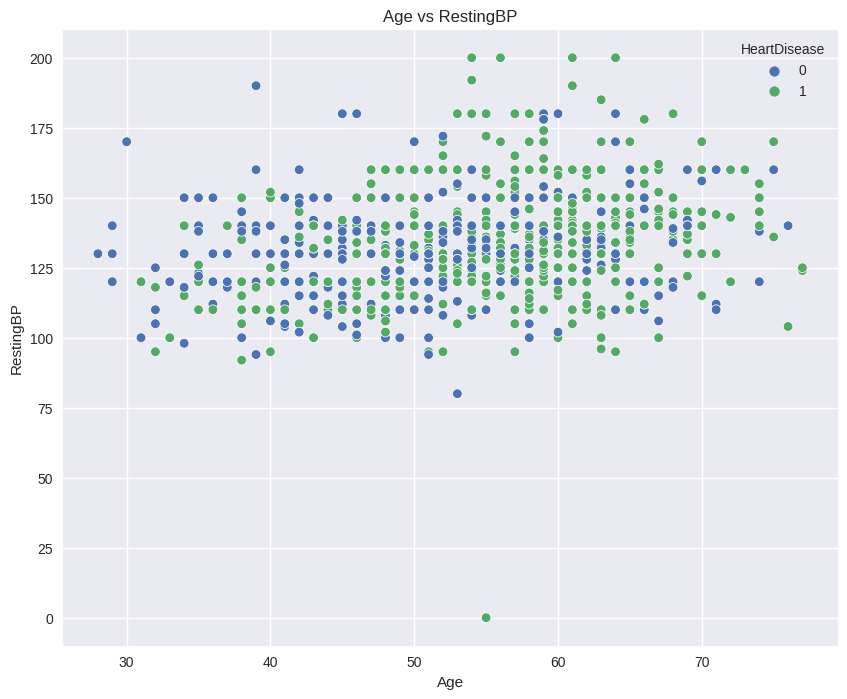

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart_data["Age"], y=heart_data["RestingBP"],hue = heart_data['HeartDisease']).set_title("Age vs RestingBP")

Text(0.5, 1.0, 'Age vs Oldpeak')

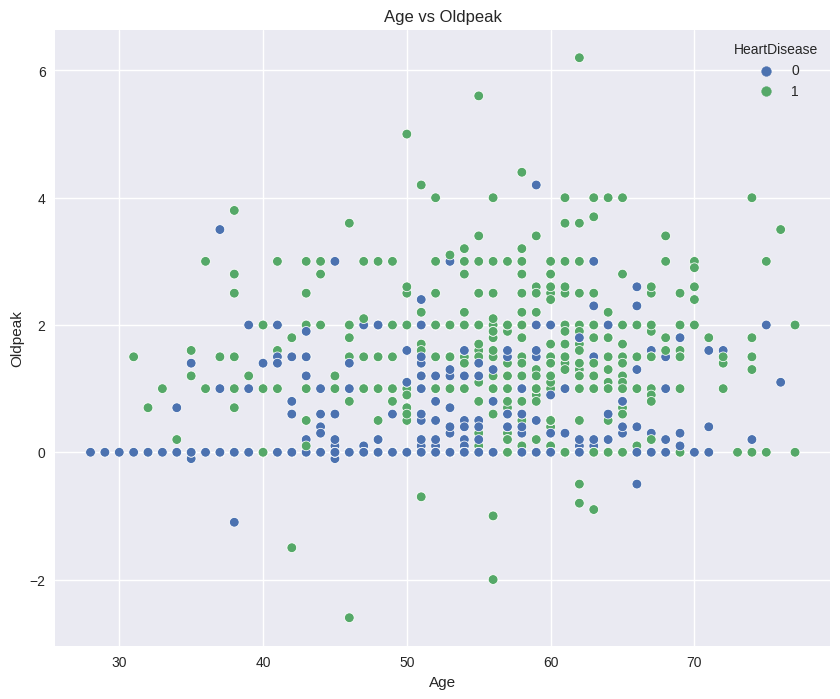

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart_data["Age"], y=heart_data["Oldpeak"],hue = heart_data['HeartDisease']).set_title("Age vs Oldpeak")

#Detecting and Outliers

<ipython-input-32-399bc7674644>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

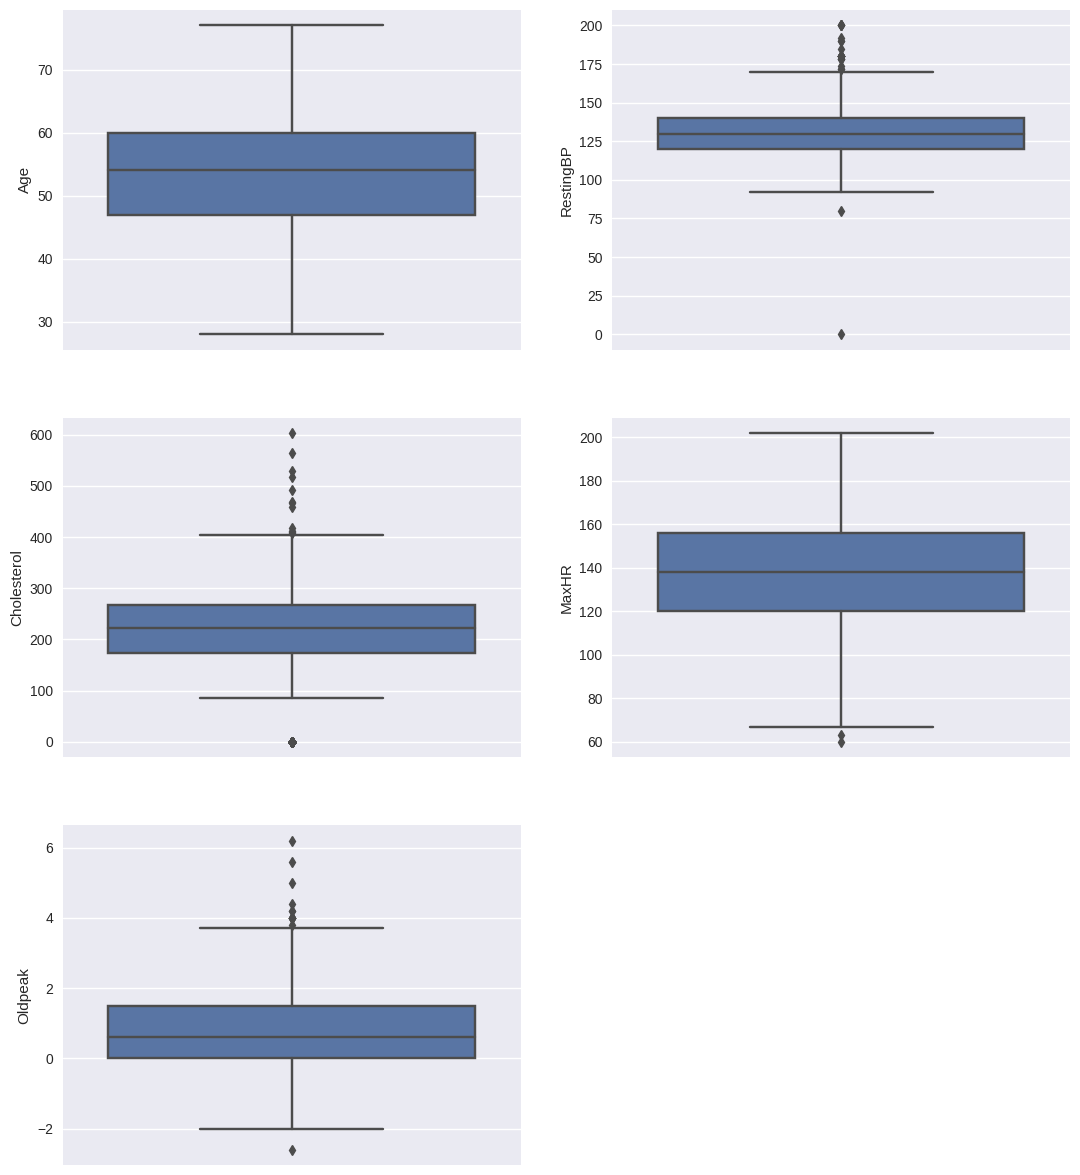

In [ ]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in heart_data.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.boxplot(y=heart_data[feature])
        i+=1

In [ ]:
temp = heart_data.copy()

In [ ]:
for variable in numerical_variables:
  stat, p = stats.shapiro(temp[variable])

  alpha = 0.05
  if p > alpha:
      print('"{}" looks normally distributed (fail to reject H0)'.format(variable))
  else:
      print('"{}" does not look normally distributed (reject H0)'.format(variable))
  print(" ")

"Age" does not look normally distributed (reject H0)
 
"RestingBP" does not look normally distributed (reject H0)
 
"Cholesterol" does not look normally distributed (reject H0)
 
"MaxHR" does not look normally distributed (reject H0)
 
"Oldpeak" does not look normally distributed (reject H0)
 


In [ ]:
# Calculate the IQR of the data
Q1 = temp['Cholesterol'].quantile(0.25)
Q3 = temp['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify the outliers in the dataframe
outliers = temp[(temp['Cholesterol'] < lower_bound) | (temp['Cholesterol'] > upper_bound)].dropna()

# Delete the outliers from the dataframe
temp= temp.drop(outliers.index)

In [ ]:
Q1 = temp['Oldpeak'].quantile(0.25)
Q3 = temp['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['Oldpeak'] < lower_bound) | (temp['Oldpeak'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [ ]:
Q1 = temp['RestingBP'].quantile(0.25)
Q3 = temp['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['RestingBP'] < lower_bound) | (temp['RestingBP'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [ ]:
Q1 = temp['MaxHR'].quantile(0.25)
Q3 = temp['MaxHR'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['MaxHR'] < lower_bound) | (temp['MaxHR'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [ ]:
Q1 = temp['Age'].quantile(0.25)
Q3 = temp['Age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['Age'] < lower_bound) | (temp['Age'] > upper_bound)].dropna()

outliers.shape

(0, 12)

**After Removing Outliers**

<ipython-input-40-708fa0126542>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

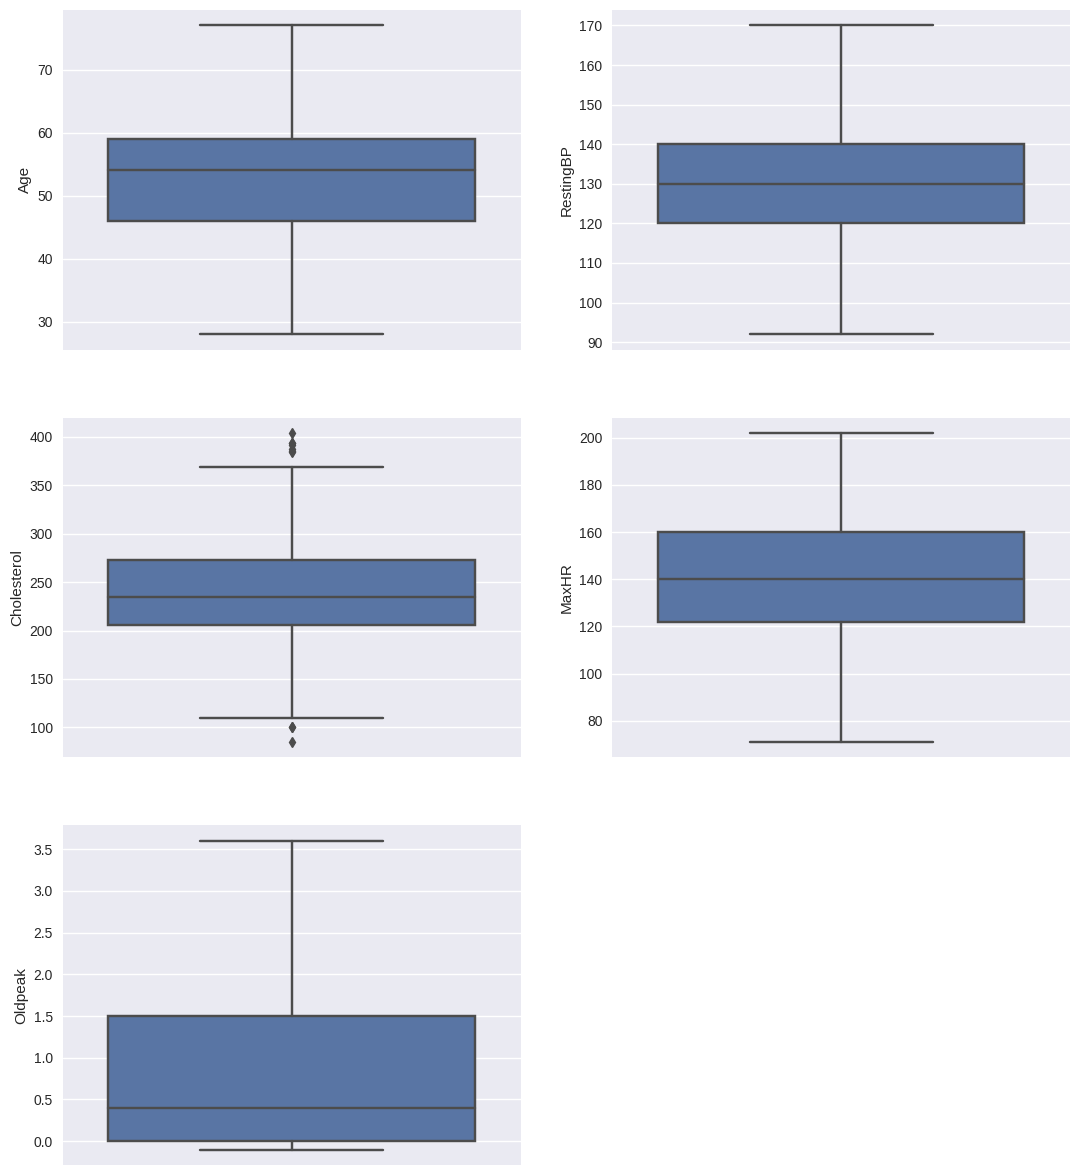

In [ ]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in temp.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.boxplot(y=temp[feature])
        i+=1

In [ ]:
temp.shape # checking shape of our dataset

(707, 12)

<Figure size 2000x4000 with 0 Axes>

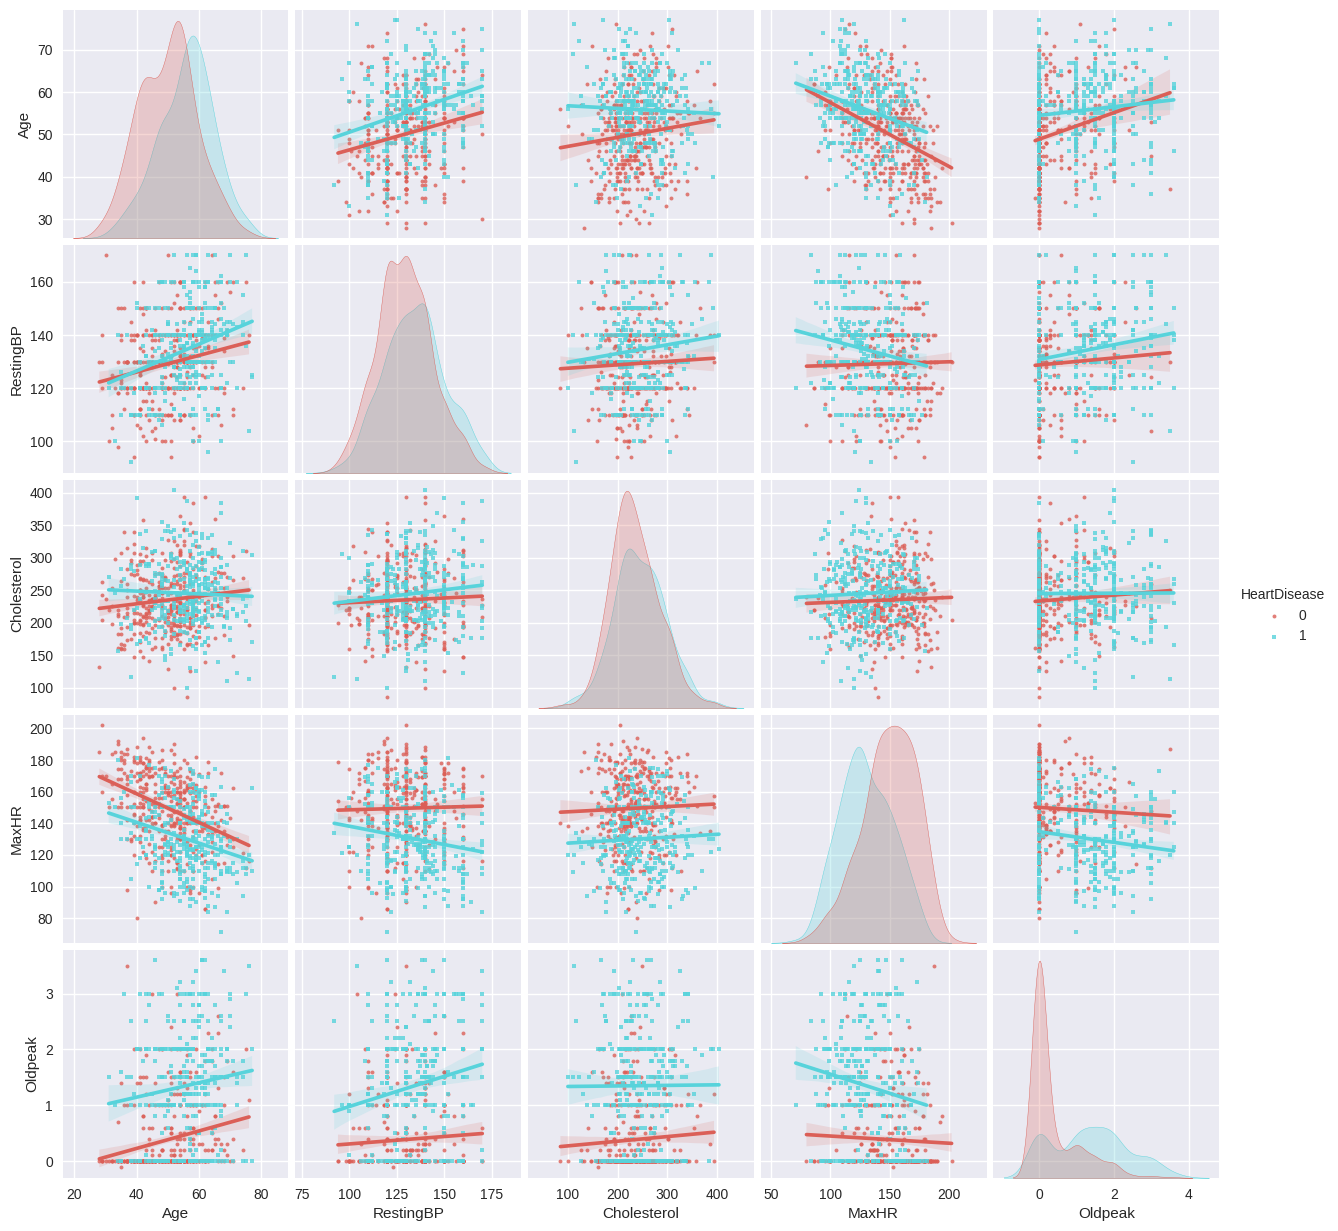

In [ ]:
plt.figure(figsize=(20,40))
sns.pairplot(data=temp[numerical_variables + ["HeartDisease"]], hue="HeartDisease", palette='hls', kind="reg", markers=["o", "s"], plot_kws={ 'scatter_kws': {'alpha': 0.8, 's':8}})

Converting categirical variables into numerical

In [ ]:
encoded_data = pd.get_dummies(temp, columns = ['ExerciseAngina','FastingBS','ST_Slope','ChestPainType','RestingECG'],drop_first=True)

Checking for correlation

Text(0.5, 1.0, 'Data correlations')

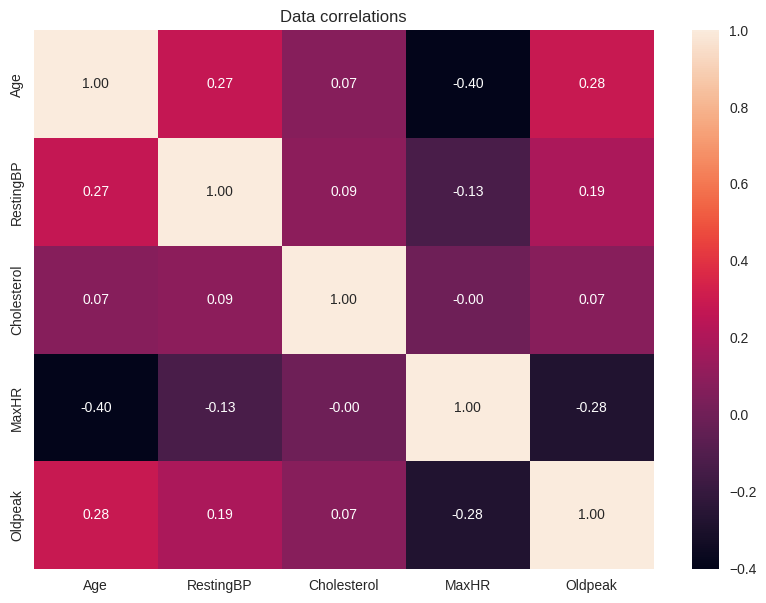

In [ ]:
correlation=encoded_data[numerical_variables].corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10})
plt.title("Data correlations")

In [ ]:
imputer = KNNImputer(n_neighbors=4)
temp_data = encoded_data.copy()
names = temp_data.columns
temp_data['Sex'] = temp_data.Sex.map({'M':1, 'F':0})
temp_data = imputer.fit_transform(temp_data)
temp_data = pd.DataFrame(temp_data, columns = names)

In [ ]:
X = temp_data.drop('HeartDisease', axis = 1)
y = temp_data[['HeartDisease']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X.shape

(707, 15)

Principle Component Analysis

In [ ]:
scaler = StandardScaler()
pca = PCA(0.95)

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
X_train

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,ExerciseAngina_Y,FastingBS_1,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
66,57.0,1.0,140.0,265.0,145.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
11,58.0,1.0,136.0,164.0,99.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
367,59.0,1.0,140.0,274.0,154.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
581,62.0,0.0,138.0,294.0,106.0,1.9,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
178,50.0,0.0,120.0,328.0,110.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46.0,1.0,150.0,163.0,116.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
106,38.0,1.0,140.0,297.0,150.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
270,53.0,1.0,120.0,181.0,132.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
435,40.0,1.0,140.0,199.0,178.0,1.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
scaled_X_train

array([[ 4.23813644e-01,  5.66247259e-01,  5.29927564e-01, ...,
        -2.35702260e-01, -1.16291915e+00,  2.20928775e+00],
       [ 5.29928160e-01,  5.66247259e-01,  2.77666213e-01, ...,
        -2.35702260e-01, -1.16291915e+00,  2.20928775e+00],
       [ 6.36042676e-01,  5.66247259e-01,  5.29927564e-01, ...,
        -2.35702260e-01,  8.59905006e-01, -4.52634564e-01],
       ...,
       [-6.44420138e-04,  5.66247259e-01, -7.31379189e-01, ...,
        -2.35702260e-01,  8.59905006e-01, -4.52634564e-01],
       [-1.38013313e+00,  5.66247259e-01,  5.29927564e-01, ...,
         4.24264069e+00,  8.59905006e-01, -4.52634564e-01],
       [-3.18987968e-01,  5.66247259e-01,  5.29927564e-01, ...,
        -2.35702260e-01,  8.59905006e-01, -4.52634564e-01]])

In [ ]:
PCA_X_train = pca.fit_transform(scaled_X_train)
PCA_X_test = pca.transform(scaled_X_test)

In [ ]:
PCA_X_train.shape

(494, 13)

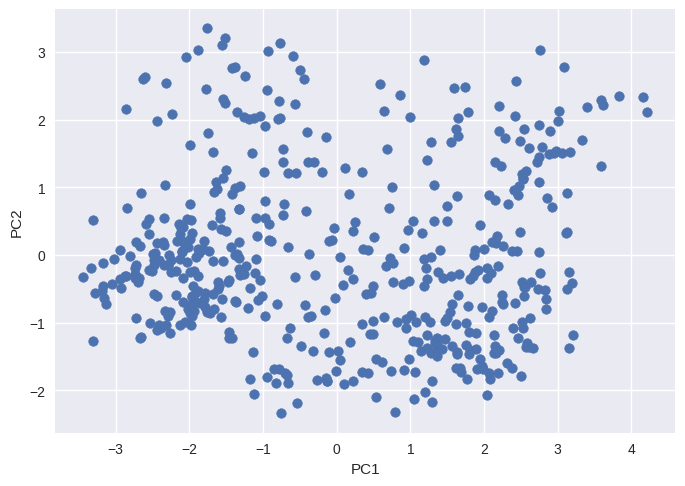

In [ ]:
plt.scatter(PCA_X_train[:, 0], PCA_X_train[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#Designing Algorithms

KNN with Normal dataset

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

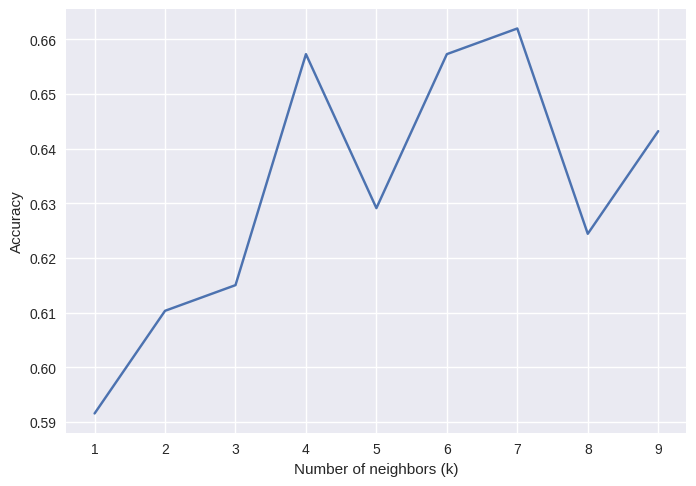

In [ ]:
k_values = range(1, 10)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

# Plot the accuracy vs. k curve
plt.plot(k_values, accuracies)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

KNN with Scaled dataset

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

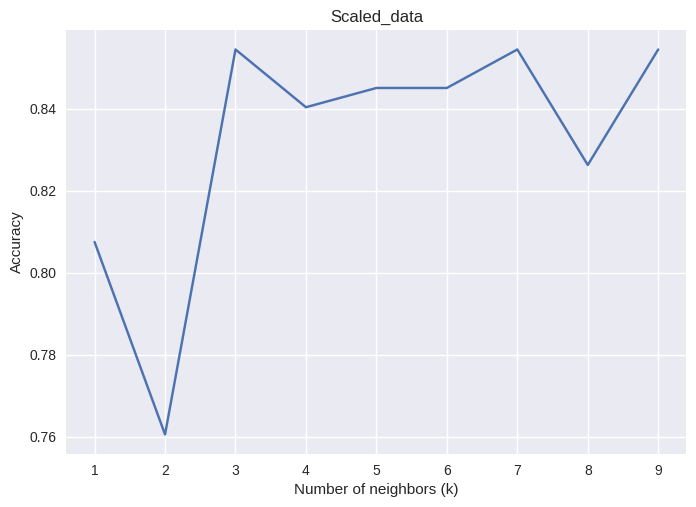

In [ ]:
k_values = range(1, 10)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    predictions = knn.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

# Plot the accuracy vs. k curve
plt.plot(k_values, accuracies)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Scaled_data')
plt.show()

KNN with PCA applied dataset

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

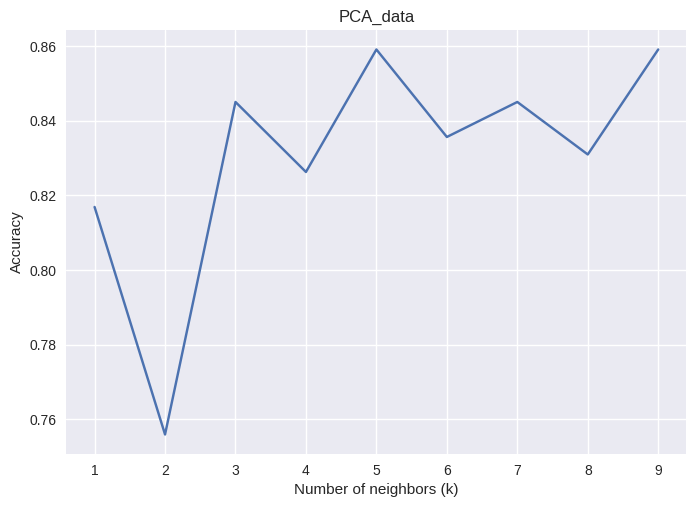

In [ ]:
k_values = range(1, 10)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(PCA_X_train, y_train)
    predictions = knn.predict(PCA_X_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

# Plot the accuracy vs. k curve
plt.plot(k_values, accuracies)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('PCA_data')
plt.show()

Best KNN model with k = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
tic = time.time()
knn.fit(scaled_X_train, y_train)
toc = time.time()
predictions = knn.predict(scaled_X_test)
accuracy = accuracy_score(y_test, predictions)
print("The best accuracy for knn is with 3 neighbours and that is :{}".format(accuracy*100))
print("The taken to train the model is :{}".format(toc-tic))
print('Accuracy:', predictions)
# Calculate precision and recall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')


The best accuracy for knn is with 3 neighbours and that is :85.44600938967136
The taken to train the model is :0.002940654754638672
Accuracy: [1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


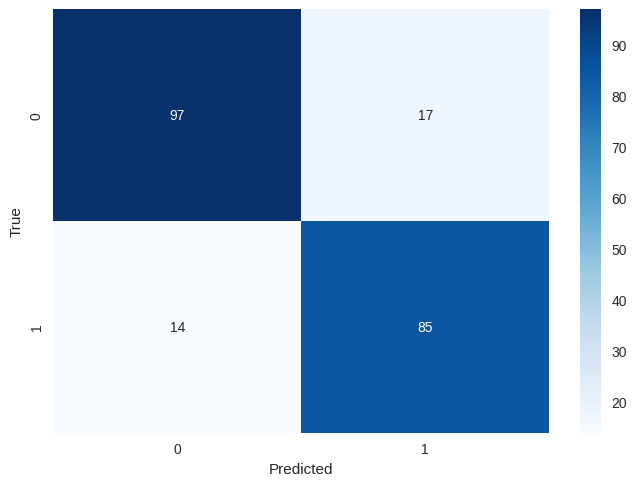

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("The best accuracy for knn is with 3 neighbours and that is :{}".format(accuracy*100))
print("The taken to train the model is :{}".format(toc-tic))
print("Precision:{}".format(precision*100 ))
print("Recall:{}".format(recall*100 ))
print("F1 score:{}".format(precision*100 ))

The best accuracy for knn is with 3 neighbours and that is :85.44600938967136
The taken to train the model is :0.002940654754638672
Precision:83.33333333333334
Recall:85.85858585858585
F1 score:83.33333333333334


Accuracy: [1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


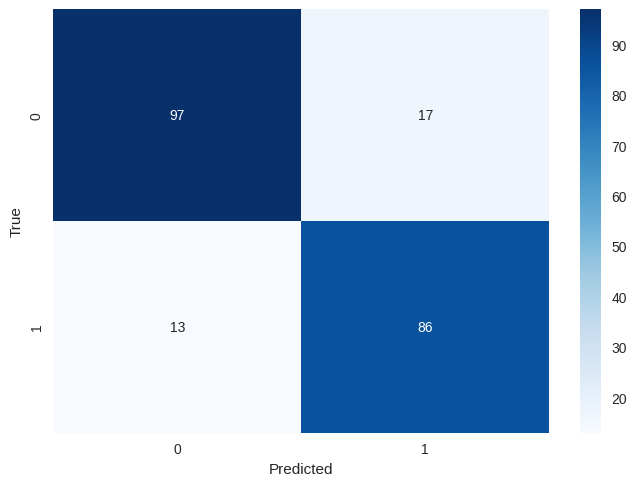

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
tic = time.time()
knn.fit(PCA_X_train, y_train)
toc = time.time()
predictions = knn.predict(PCA_X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', predictions)
# Calculate precision and recall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("The best accuracy for knn is with 3 neighbours and that is :{}".format(accuracy*100))
print("The taken to train the model is :{}".format(toc-tic))
print("Precision:{}".format(precision*100 ))
print("Recall:{}".format(recall*100 ))
print("F1 score:{}".format(precision*100 ))

The best accuracy for knn is with 3 neighbours and that is :85.91549295774648
The taken to train the model is :0.0033032894134521484
Precision:83.49514563106796
Recall:86.86868686868688
F1 score:83.49514563106796


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
tic = time.time()
knn.fit(PCA_X_train, y_train)
toc = time.time()
predictions = knn.predict(PCA_X_test)
accuracy = accuracy_score(y_test, predictions)
print("The best accuracy for knn is with 3 neighbours and that is :{}".format(accuracy*100))
print("The taken to train the model is :{}".format(toc-tic))

The best accuracy for knn is with 3 neighbours and that is :84.50704225352112
The taken to train the model is :0.004281759262084961


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
scaled_data = pd.concat([train_data, test_data], axis=0)

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=553fbc913c63950f031733b5c04081d1e9d937e588d92b5957d652e5ecfaed72
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
# Import necessary libraries
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("MySpark").getOrCreate()

# Load data as a Spark DataFrame
spark_scaled_data = spark.createDataFrame(scaled_data)

# Split the data into training and testing sets
(train_data, test_data) = spark_scaled_data.randomSplit([0.7, 0.3], seed=42)

# Create a feature vector assembler
feature_cols = [c for c in spark_scaled_data.columns if c != "HeartDisease"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Apply the feature vector assembler to the data
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

train_data.select("features","HeartDisease").show()


KeyboardInterrupt: ignored

In [ ]:
# initialize logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="HeartDisease")

# set hyperparameters
lr.setRegParam(0.01)
lr.setMaxIter(100)

# train the model
tic = time.time()
model = lr.fit(train_data)
toc = time.time()
# make predictions on test set
predictions = model.transform(test_data)

# evaluate the model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="HeartDisease")
auc = evaluator.evaluate(predictions)

print("AUC:", auc)
print(toc-tic)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize logistic regression model
lr = LogisticRegression()

# Train the model
tic = time.time()
lr.fit(scaled_X_train, y_train)
toc = time.time()
# Make predictions on test set
y_pred = lr.predict(scaled_X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print(toc-tic)